# Finals

In [172]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math
import scipy

import warnings
warnings.filterwarnings('ignore')

In [173]:
#loading files for our use

file1=open("./data/Expasy_AA_scales.txt",'r+')
file2=open("./data/samples.txt","r+")
file3=open("./data/UniProt2Seq.txt","r+")

In [174]:
with file1 as f:
    t=f.readlines()

new_list=[]
for i in range(0,len(t)):
    q=t[i]
    q=q.split("\t")
    new_list.append(q)

df1=pd.DataFrame(new_list)
df1.columns=df1.iloc[0]
df1=df1[1:] #cleans up the dataframe and gets the values into a dataframe that can be used for parameter reading
df1.rename(columns= {'Hphob_Rf_mobility\n':'Hphob_Rf_mobility'}, inplace=True)
df1['Hphob_Rf_mobility'] = df1['Hphob_Rf_mobility'].str.replace('\n', '')

In [175]:
df1

,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,Bulkiness,Hphob_Black,n_codons,Hphob_Abraham_Leo,Hphob_Bull_Breese,Hphob_Janin,Hphob_Miyazawa,Hphob_HPLC_pH34_Cowan,beta_sheet_Chou_Fasman,Hphob_HPLC_pH75_Cowan,Hphob_Chothia,AA_composition,alpha_helix_Deleage_Roux,Transmembrane_tendency,HPLC_retention_pH21,Hphob_Hopp_Woods,HPLC_HFBA_retention,AA_comp_in_Swiss_Prot,Polarity_Zimmerman,Hphob_Manavalan,Hphob_Rao_Argos,Polarity_Grantham,beta_turn_Levitt,Hphob_Roseman,Average_flexibility,Refractivity,Average_area_buried,Hphob_Fauchere,Relative_mutability,Hphob_OMH_Sweet,Molecular_weight,Hphob_Eisenberg,HPLC_TFA_retention,alpha_helix_Levitt,Hphob_Welling,alpha_helix_Chou_Fasman,beta_turn_Chou_Fasman,Total_beta_strand,Antiparallel_beta_strand,Hphob_Guy,Ratio_hetero_endside,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
1,A,0.824,0.709,0.5,0.9,1.94,0.788,11.5,0.616,4.0,0.44,0.61,0.3,5.33,0.42,0.83,0.35,0.38,8.3,1.489,0.38,-0.1,-0.5,3.9,8.25,0.0,12.97,1.36,8.1,0.77,0.39,0.36,4.34,86.6,0.31,100.0,-0.4,89.0,0.62,7.3,1.29,1.15,1.42,0.66,0.92,0.9,0.1,0.0,-0.3,2.1,0.62,11.2,78.0,0.74,1.0,6.6,1.8,5.1
2,C,0.953,1.191,-6.8,0.74,-1.24,0.965,13.46,0.68,1.0,0.58,0.36,0.9,7.93,0.84,1.19,0.76,0.5,1.7,0.966,-0.3,-2.2,-1.0,-14.3,1.37,1.48,14.63,1.27,5.5,0.81,0.25,0.35,35.77,132.3,1.54,20.0,0.17,121.0,0.29,-9.2,1.11,-1.2,0.7,1.19,1.16,1.24,-1.42,2.75,6.3,1.4,0.29,4.1,89.0,0.91,0.91,0.9,2.5,0.0
3,E,0.761,0.567,-16.9,0.75,-10.2,1.149,13.57,0.043,2.0,-0.34,0.51,-0.7,3.65,-0.37,0.37,-1.95,0.18,6.2,1.504,-2.9,-7.5,3.0,-7.5,6.75,49.9,11.89,0.25,12.3,0.99,-2.91,0.5,17.26,113.9,-0.64,102.0,-1.22,147.0,-0.74,-7.1,1.44,-0.71,1.51,0.74,0.61,0.62,0.83,0.92,0.0,7.8,-0.74,1.8,78.0,0.62,0.59,5.7,-3.5,1.8
4,D,1.197,0.541,-8.2,0.72,-10.95,1.197,11.68,0.028,2.0,-0.31,0.61,-0.6,3.59,-0.51,0.54,-2.15,0.15,5.3,0.924,-3.27,-2.8,3.0,-2.8,5.45,49.7,10.85,0.11,13.0,1.41,-3.81,0.51,12.0,97.8,-0.77,106.0,-1.31,133.0,-0.9,-2.9,1.04,0.65,1.01,1.46,0.48,0.47,0.78,1.38,-1.4,10.0,-0.09,2.9,81.0,0.62,0.5,7.7,-3.5,0.7
5,G,1.251,0.657,0.0,0.92,2.39,1.86,3.4,0.501,4.0,0.0,0.81,0.3,4.48,0.0,0.75,0.0,0.36,7.2,0.51,-0.19,-0.5,0.0,-2.3,7.07,0.0,12.43,1.09,9.0,1.64,0.0,0.54,0.0,62.9,0.0,49.0,-0.67,75.0,0.48,-1.2,0.56,-1.84,0.57,1.56,0.61,0.56,0.33,0.74,1.2,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1
6,F,0.797,1.393,13.2,1.32,-0.76,0.624,19.8,1.0,2.0,2.54,-1.52,0.5,9.03,1.74,1.38,1.69,0.5,3.9,1.195,1.98,13.9,-2.5,14.7,3.86,0.35,14.0,1.57,5.2,0.59,2.27,0.31,29.4,194.1,1.79,41.0,1.92,165.0,1.19,19.2,1.07,-1.41,1.13,0.6,1.25,1.23,-2.12,0.0,7.5,-9.2,1.19,5.1,81.0,0.88,1.3,2.4,2.8,9.6
7,I,0.886,1.799,13.9,1.45,2.15,0.24,21.4,0.943,3.0,2.46,-1.45,0.7,8.83,1.81,1.6,1.83,0.6,5.2,1.003,1.97,11.8,-1.8,11.0,5.96,0.13,15.67,1.44,5.2,0.51,1.82,0.46,19.06,158.0,1.8,96.0,1.25,131.0,1.38,6.6,0.97,-2.92,1.08,0.47,1.81,1.54,-1.13,0.0,4.3,-8.0,1.38,8.6,88.0,0.88,2.6,2.8,4.5,9.3
8,H,1.068,0.863,-3.5,1.08,-10.27,0.97,13.69,0.165,2.0,-0.01,0.69,-0.1,5.1,-2.28,0.87,-0.65,0.17,2.2,1.003,-1.44,0.8,-0.5,2.0,2.27,51.6,12.16,0.68,10.4,0.68,-0.64,0.32,21.81,155.8,0.13,66.0,-0.64,155.0,-0.4,-2.1,1.22,3.12,1.0,0.95,0.93,1.12,-0.5,0.58,-1.3,2.1,-0.4,2.0,84.0,0.78,0.38,2.5,-3.2,1.6
9,K,0.897,0.721,0.1,0.77,-9.52,1.302,15.71,0.283,2.0,-2.45,0.46,-1.8,2.95,-2.03,0.74,-1.54,0.03,5.7,1.172,-3.46,-3.2,3.0,-2.5,5.84,49.5,11.36,0.09,11.3,0.96,-2.77,0.47,21.29,115.5,-0.99,56.0,-0.67,146.0,-1.5,-3.7,1.23,2.06,1.16,1.01,0.7,0.74,1.4,0.33,-3.6,5.7,-1.5,0.5,87.0,0.52,0.59,10.3,-3.9,1.3
10,M,0.81,1.21,4.8,0.97,-1.48,0.436,16.25,0.738,1.0,1.1,-0.66,0.4,8.95,1.18,1.05,1.1,0.4,2.4,1.363,1.4,7.1,-1.3,4.1,2.42,1.43,14.39,1.42,5.7,0.41,0.96,0.3,21.64,172.9,1.23,94.0,1.02,149.0,0.64,5.6,1.47,-3.85,1.45,0.6,1.19,1.09,-1.59,0.0,2.5,-4.2,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7


In [176]:
with file2 as a:
    u=a.readlines() 
    
new_list2=[]
for i in range(0,len(u)):
    q=u[i]
    q=q.split("\t")    
    new_list2.append(q)
df2=pd.DataFrame(new_list2)
df2.columns=df2.iloc[0]
df2=df2[1:]
df2.rename(columns= {'is_alpha_helix\n':'is_alpha_helix'}, inplace=True)
df2['is_alpha_helix'] = df2['is_alpha_helix'].str.replace('\n', '')

In [177]:
with file3 as f:
    v=f.readlines()
    
new_list3=[]
for i in range(0,len(v)):
    w=v[i]
    w=w.split("\t")    
    new_list3.append(w)
df3=pd.DataFrame(new_list3)
df3.columns=df3.iloc[0]
df3=df3[1:]
df3.rename(columns= {'AA\n':'AA'}, inplace=True)
df3['AA'] = df3['AA'].str.replace('\n', '')

In [178]:
df_set1= df2.merge(df3)
df_raw=df_set1.merge(df1)
for column in df_raw:
    if column=='UniProt':
        df_raw["UniProt"]=df_raw["UniProt"].astype('string')
    elif column=='AA':
        df_raw["AA"]=df_raw["AA"].astype('string')
    elif column=="is_alpha_helix":
         df_raw["is_alpha_helix"]=df_raw["is_alpha_helix"].astype('string')
    else: 
        df_raw[column]=df_raw[column].astype(float)

In [179]:
#data cleaning - drop duplicates
# check for null values

df_raw.drop_duplicates(inplace=True)
df_raw.sort_values(by=['UniProt','Position'], inplace=True)
df_raw.reset_index(inplace=True)

In [180]:
df_preprep= df_raw.drop(columns=['index'])
df_preprep

,UniProt,Position,is_alpha_helix,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,Bulkiness,Hphob_Black,n_codons,Hphob_Abraham_Leo,Hphob_Bull_Breese,Hphob_Janin,Hphob_Miyazawa,Hphob_HPLC_pH34_Cowan,beta_sheet_Chou_Fasman,Hphob_HPLC_pH75_Cowan,Hphob_Chothia,AA_composition,alpha_helix_Deleage_Roux,Transmembrane_tendency,HPLC_retention_pH21,Hphob_Hopp_Woods,HPLC_HFBA_retention,AA_comp_in_Swiss_Prot,Polarity_Zimmerman,Hphob_Manavalan,Hphob_Rao_Argos,Polarity_Grantham,beta_turn_Levitt,Hphob_Roseman,Average_flexibility,Refractivity,Average_area_buried,Hphob_Fauchere,Relative_mutability,Hphob_OMH_Sweet,Molecular_weight,Hphob_Eisenberg,HPLC_TFA_retention,alpha_helix_Levitt,Hphob_Welling,alpha_helix_Chou_Fasman,beta_turn_Chou_Fasman,Total_beta_strand,Antiparallel_beta_strand,Hphob_Guy,Ratio_hetero_endside,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
0,A6X980,1.0,0,M,0.810,1.210,4.8,0.97,-1.48,0.436,16.25,0.738,1.0,1.10,-0.66,0.4,8.95,1.18,1.05,1.10,0.40,2.4,1.363,1.40,7.1,-1.3,4.1,2.42,1.43,14.39,1.42,5.7,0.41,0.96,0.30,21.64,172.9,1.23,94.0,1.02,149.0,0.64,5.6,1.47,-3.85,1.45,0.60,1.19,1.09,-1.59,0.00,2.5,-4.2,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7
1,A6X980,2.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
2,A6X980,3.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
3,A6X980,4.0,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,12.82,0.236,2.0,-1.32,0.89,-0.5,3.71,-1.03,0.89,-0.99,0.12,4.4,0.772,-1.62,-1.6,0.2,-2.8,4.06,3.38,11.42,0.33,11.6,1.28,-1.91,0.46,13.28,103.3,-0.60,134.0,-0.92,132.0,-0.78,-5.7,0.90,-0.77,0.67,1.56,0.60,0.62,0.48,1.33,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
4,A6X980,5.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57362,T0D7A2,1125.0,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,12.82,0.236,2.0,-1.32,0.89,-0.5,3.71,-1.03,0.89,-0.99,0.12,4.4,0.772,-1.62,-1.6,0.2,-2.8,4.06,3.38,11.42,0.33,11.6,1.28,-1.91,0.46,13.28,103.3,-0.60,134.0,-0.92,132.0,-0.78,-5.7,0.90,-0.77,0.67,1.56,0.60,0.62,0.48,1.33,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
57363,T0D7A2,1126.0,0,T,1.148,1.221,2.7,1.21,-4.88,0.739,15.77,0.450,4.0,-0.41,0.29,-0.2,4.49,-0.26,1.19,-0.27,0.23,5.8,0.785,-0.32,1.5,-0.4,1.1,5.34,1.66,11.69,1.08,8.6,1.04,-1.00,0.44,11.01,106.5,0.26,97.0,-0.28,119.0,-0.05,0.8,0.82,-0.45,0.83,0.96,1.12,1.30,0.07,0.71,-2.2,5.2,-0.05,4.9,93.0,0.70,0.59,7.0,-0.7,3.5
57364,T0D7A2,1127.0,0,G,1.251,0.657,0.0,0.92,2.39,1.860,3.40,0.501,4.0,0.00,0.81,0.3,4.48,0.00,0.75,0.00,0.36,7.2,0.510,-0.19,-0.5,0.0,-2.3,7.07,0.00,12.43,1.09,9.0,1.64,0.00,0.54,0.00,62.9,0.00,49.0,-0.67,75.0,0.48,-1.2,0.56,-1.84,0.57,1.56,0.61,0.56,0.33,0.74,1.2,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1
57365,T0D7A2,1128.0,0,D,1.197,0.541,-8.2,0.72,-10.95,1.197,11.68,0.028,2.0,-0.31,0.61,-0.6,3.59,-0.51,0.54,-2.15,0.15,5.3,0.924,-3.27,-2.8,3.0,-2.8,5.45,49.70,10.85,0.11,13.0,1.41,-3.81,0

# To convert variables into Numeric and Categorical and then to do Initial Feature Testing

# To view Histogram, as an indicator of spread of numerical data as a part of themselves

df_preprep.hist(bins=50, figsize=(80,80))
#plt.show()

In [181]:
#To get an overview of the stats of each variable

df_preprep.describe()

,Position,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,Bulkiness,Hphob_Black,n_codons,Hphob_Abraham_Leo,Hphob_Bull_Breese,Hphob_Janin,Hphob_Miyazawa,Hphob_HPLC_pH34_Cowan,beta_sheet_Chou_Fasman,Hphob_HPLC_pH75_Cowan,Hphob_Chothia,AA_composition,alpha_helix_Deleage_Roux,Transmembrane_tendency,HPLC_retention_pH21,Hphob_Hopp_Woods,HPLC_HFBA_retention,AA_comp_in_Swiss_Prot,Polarity_Zimmerman,Hphob_Manavalan,Hphob_Rao_Argos,Polarity_Grantham,beta_turn_Levitt,Hphob_Roseman,Average_flexibility,Refractivity,Average_area_buried,Hphob_Fauchere,Relative_mutability,Hphob_OMH_Sweet,Molecular_weight,Hphob_Eisenberg,HPLC_TFA_retention,alpha_helix_Levitt,Hphob_Welling,alpha_helix_Chou_Fasman,beta_turn_Chou_Fasman,Total_beta_strand,Antiparallel_beta_strand,Hphob_Guy,Ratio_hetero_endside,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
count,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000,57367.000000
mean,409.450730,0.991602,0.981134,1.285985,0.982204,-4.236784,0.985475,14.942850,0.505674,3.526418,0.285616,-0.024032,-0.153581,5.421451,0.096855,0.983548,-0.042636,0.277356,5.869861,1.027677,-0.534153,1.756107,0.079760,2.416267,5.914228,13.998184,12.763244,0.865111,8.576319,0.987322,-0.482704,0.444104,15.613067,123.702437,0.343970,77.824429,-0.097074,129.143549,-0.018572,2.598989,1.027976,-0.178252,1.017677,0.983246,0.987321,0.991021,0.051598,0.574493,1.557993,1.615424,0.114266,5.997227,87.596876,0.720272,0.983364,5.707131,-0.377283,4.657924
std,443.629751,0.208860,0.428585,7.400212,0.242001,6.292148,0.418611,4.912337,0.329189,1.616943,1.531184,0.908325,0.693867,2.031509,1.208090,0.373512,1.301982,0.173611,1.855402,0.304088,1.807251,6.266226,1.831849,6.914758,2.013899,21.742711,1.581643,0.521415,2.588351,0.402061,1.956355,0.073104,8.870548,37.186963,0.957889,29.743032,0.954598,27.864829,1.008475,8.221892,0.271476,1.359841,0.283273,0.379318,0.410023,0.370123,1.029648,0.578685,3.390451,6.160695,1.096517,4.410263,7.722099,0.108280,0.664424,2.289692,3.023142,3.319015
min,1.000000,0.761000,0.354000,-16.900000,0.640000,-19.920000,0.240000,3.400000,0.000000,1.000000,-2.450000,-1.650000,-1.800000,2.950000,-2.280000,0.370000,-2.150000,0.010000,1.300000,0.492000,-3.460000,-7.500000,-3.400000,-14.300000,1.080000,0.000000,10.850000,0.090000,4.900000,0.410000,-3.950000,0.300000,0.000000,62.900000,-1.010000,18.000000,-1.310000,75.000000,-2.530000,-9.200000,0.520000,-3.850000,0.570000,0.470000,0.400000,0.420000,-2.120000,0.000000,-3.600000,-10.000000,-2.530000,0.500000,78.000000,0.520000,0.280000,0.900000,-4.500000,0.000000
25%,112.000000,0.810000,0.657000,0.000000,0.770000,-9.520000,0.670000,11.680000,0.251000,2.000000,-0.710000,-0.750000,-0.600000,3.870000,-0.640000,0.750000,-0.990000,0.150000,5.100000,0.785000,-1.840000,-3.200000,-1.500000,-2.800000,4.700000,0.130000,11.420000,0.330000,5.900000,0.590000,-1.910000,0.370000,10.930000,92.900000,-0.600000,49.000000,-0.670000,115.000000,-0.780000,-3.700000,0.820000,-0.710000,0.770000,0.600000,0.610000,0.620000,-1.130000,0.000000,-0.600000,-3.700000,-0.740000,2.000000,81.000000,0.630000,0.590000,4.500000,-3.500000,1.800000
50%,258.00000

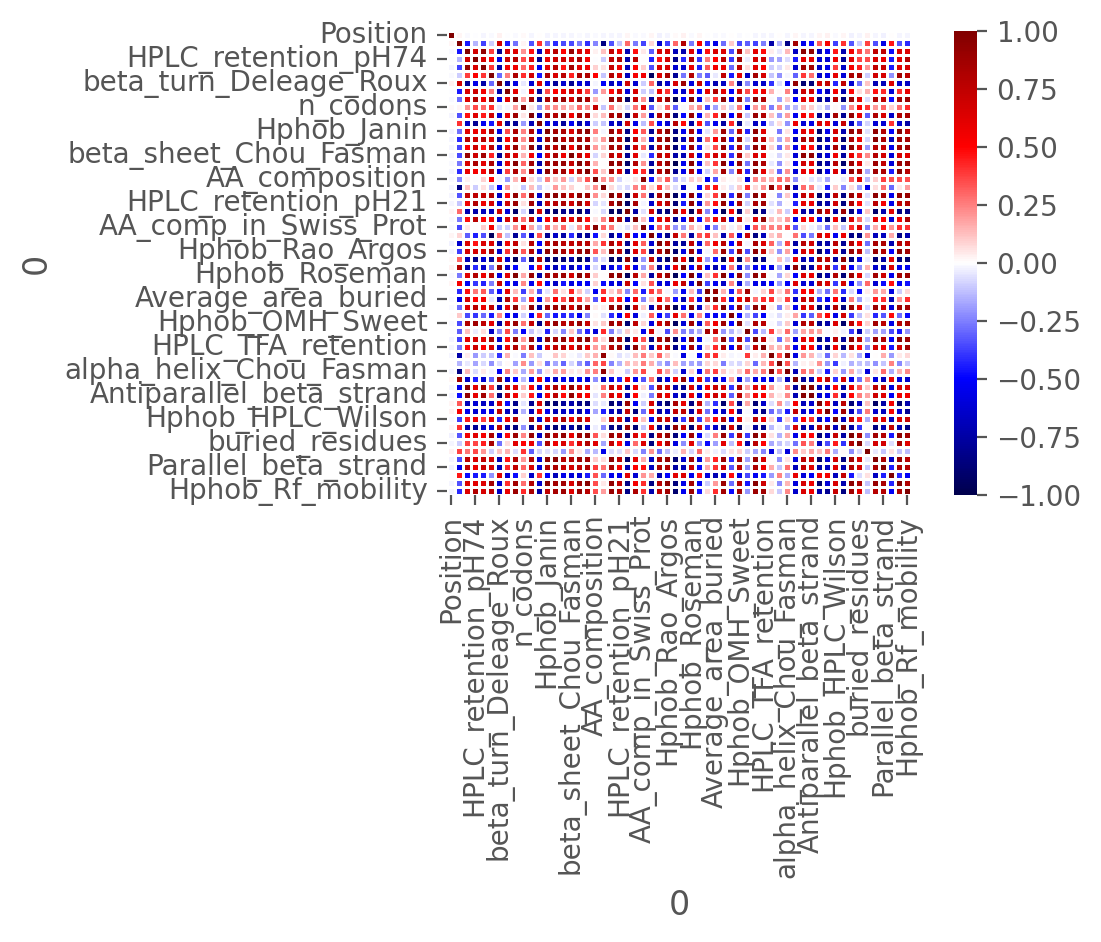

In [182]:
#To get a visual relationship of the data between the numeric variables- we have a heatmap of the correlation matrix

corr_matrix=df_preprep.corr(method='spearman') 
a=sns.heatmap(corr_matrix, cmap='seismic', vmax=1, vmin=-1, center=0, square=True,linewidth=0.5)
plt.tight_layout()

In [183]:
#Initial exploration of the categorical data


contigency_matrix=pd.crosstab(df_preprep.is_alpha_helix, df_preprep.UniProt) 
A=contigency_matrix.T
df=A
df.rename(columns={'1': 'Yes', '0': 'No'}, inplace=True)
df["Yes"].sort_values()
df["Fraction"]= df["Yes"]/ (df["Yes"] + df["No"])
df["Fraction"].sort_values() #basically what this does is to sort out the fraction of amino acids in each protein which correspond to alpha helix ones based on their names 
#for example, it says that proteins name starting with A6X and so on have very little aa as a part of alpha helix- basically for the proteins, having a fraction of aa as a part of alpha helix in range of 0.05 to 0.50 im taking those

UniProt
A6X980    0.000000
P83256    0.000000
P60775    0.000000
Q14242    0.000000
P18674    0.000000
Q980V5    0.000000
P03652    0.000000
O88491    0.001159
P11204    0.004363
Q8IWV7    0.005146
Q9Y4J8    0.008075
P43631    0.009868
P05889    0.010283
Q9UQ26    0.014883
Q13029    0.018044
Q9Y295    0.021798
Q1MX18    0.022453
P09089    0.025496
P40699    0.036304
P0A423    0.039474
P40710    0.046610
O70133    0.047826
Q9X113    0.049587
P18474    0.055005
Q96HA7    0.055878
Q13642    0.058824
P22808    0.060858
P63248    0.078947
P32951    0.079602
P15923    0.081040
P01493    0.091954
P20507    0.095491
Q9QUN7    0.096939
Q92520    0.101322
P38867    0.101545
Q84W65    0.102426
Q9WVT6    0.109792
P16293    0.112469
O11457    0.118343
Q6Q1R8    0.119363
P05413    0.127820
P02761    0.138122
P12736    0.149378
P16368    0.150000
P16480    0.156780
P43572    0.183894
P22216    0.183922
Q2FW22    0.184874
P12737    0.193939
P28814    0.200000
P40121    0.201149
P56621    0.210526
P043

In [184]:
a1=df["Fraction"]
loc= df[(df["Fraction"]>0.1) & (df["Fraction"]<0.5)] 
#check conditions for globular and fibrous proteins only

Text(0.5, 1.0, 'Fraction of AA wrt protein distribution')

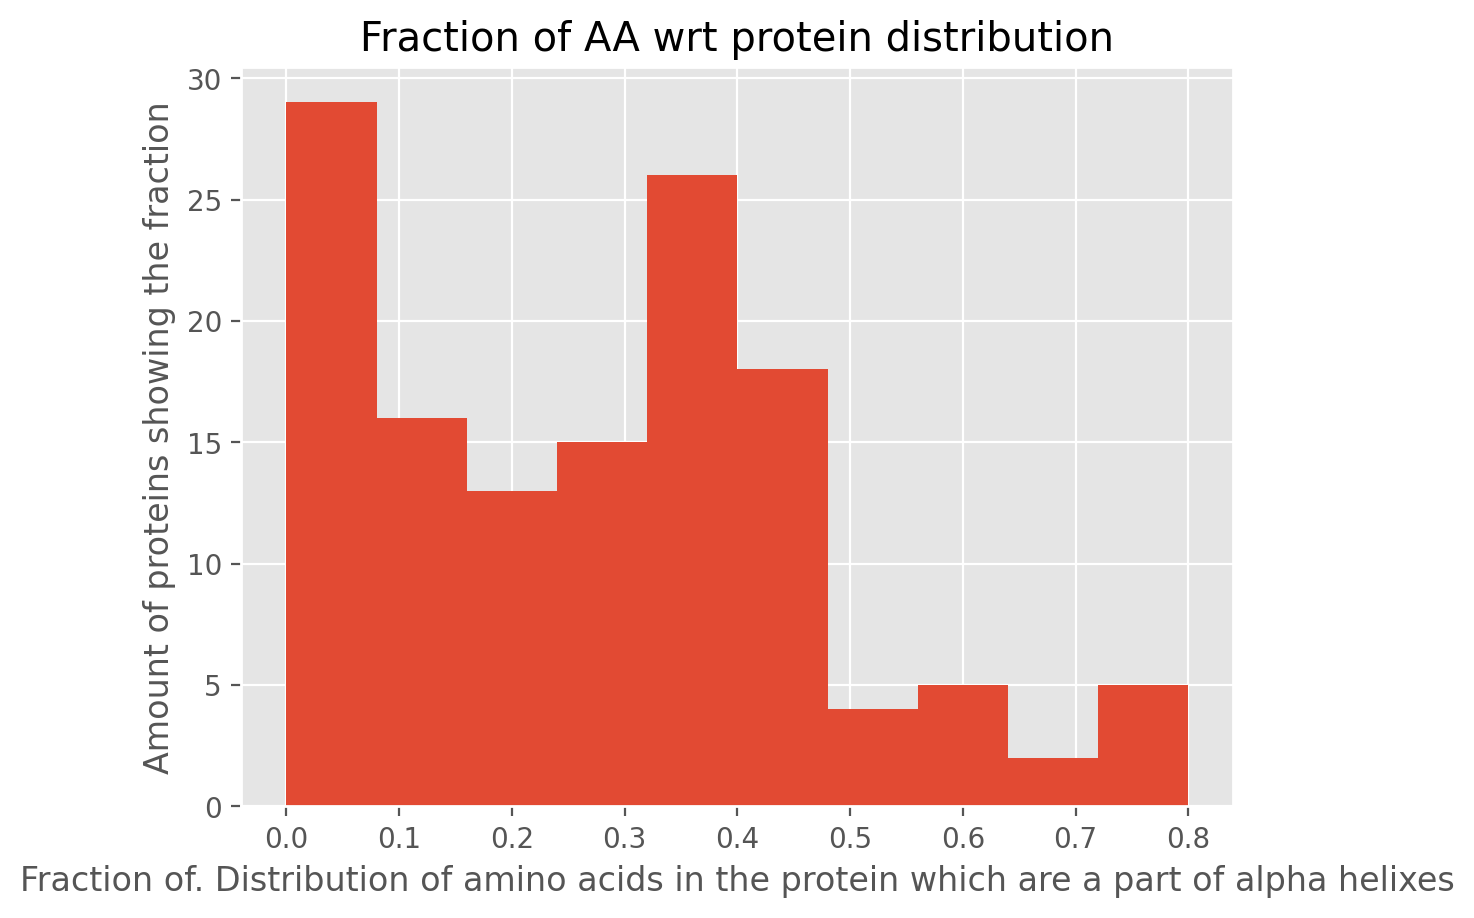

In [185]:
df["Fraction"].hist(bins=10)
plt.xlabel("Fraction of. Distribution of amino acids in the protein which are a part of alpha helixes")
plt.ylabel("Amount of proteins showing the fraction")
plt.title("Fraction of AA wrt protein distribution")  #meaning, another way to fine tune the model is to take those proteins which lie between 0.05 and 0.50- check the number of proteins?

In [186]:
df.shape

(133, 3)

In [187]:
#To check the correlation between categorical variables- ie protein names versus alpha helix or not

#First we need to label the target

from sklearn import preprocessing


target=df_preprep["is_alpha_helix"]
Data=df_preprep.drop(['is_alpha_helix'],axis=1) #converting all the other data into cat and numerical
target = preprocessing.LabelEncoder().fit_transform(target) 

#To make the variables into categories and numeric and then doing the required transformations

Data_cat1= Data[['UniProt']] #just going to get the protein categories which are useful or not first

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
Data_cat = onehot_encoder.fit_transform(Data_cat1)
Data_cat

<57367x133 sparse matrix of type '<class 'numpy.float64'>'
	with 57367 stored elements in Compressed Sparse Row format>

In [188]:
Data_cat1

,UniProt
0,A6X980
1,A6X980
2,A6X980
3,A6X980
4,A6X980
...,...
57362,T0D7A2
57363,T0D7A2
57364,T0D7A2
57365,T0D7A2


In [189]:
from sklearn.tree import DecisionTreeClassifier #getting the best features in categorical variables
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


clf = DecisionTreeClassifier(random_state=999)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=5,
                                     random_state=999)
#To check which scoring metric is the best, I iteratively run the decision tree classifer for all the possible options that are available

new_listing=[]
array1=sklearn.metrics.get_scorer_names()


# for ele in array1:
#     scoring_metric = ele
#     cv_results_full = cross_val_score(estimator=clf,
#                                  X=Data_cat,
#                                  y=target, 
#                                  cv=cv_method, 
#                                  scoring=scoring_metric)
#     new_listing.append(cv_results_full.mean().round(3)) #Based on the index of the new_listing, we can conclude which scoring algorithm is the best


scoring_metric = 'top_k_accuracy'
cv_results_full = cross_val_score(estimator=clf,
                             X=Data_cat,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)


In [190]:
#i=new_listing.index(max(new_listing)) #gives the index. Searching with the index, we find that 
#best_scoring_algorithm=array1[i]
#best_scoring_algorithm- based on the for loop

In [191]:
array1=sklearn.metrics.get_scorer_names()
array1

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [192]:
ID=df_preprep["UniProt"].unique()
ID_check=pd.DataFrame(ID, columns=["Protein_Name"])
ID_check

,Protein_Name
0,A6X980
1,A8MT69
2,B2HSY2
3,D0VX09
4,F8WRK9
5,O11457
6,O43598
7,O55023
8,O66663
9,O70133


In [193]:
from sklearn import feature_selection as fs

cv_results_full.mean().round(3)
number_of_features=10 #was 40
#using F Score to select features for categorical variable of proteins

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=number_of_features)
fs_fit_fscore.fit_transform(Data_cat, target)
fs_fit_fscore
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:number_of_features] #removing NaN values if present
fs_indices_fscore
#To see which proteins are actually to be kept in the array, I need to see their corresponding index values in ID_check_array

array([ 11,  89, 109,  26,  90, 123,  35,  41,  99,  17])

In [194]:
#To get the name of the proteins that correspond to the f_indices_fscore_array

new_array=[]
for i in range(0, len(fs_indices_fscore)):
    value= ID_check.iloc[fs_indices_fscore[i],0]
    new_array.append(value)
    
new_array #Contains the list of 20 UniProtID based categorical variables that we want to keep in our final model

['O88491',
 'Q09161',
 'Q8IWV7',
 'P05418',
 'Q13029',
 'Q9UQ26',
 'P0AB60',
 'P11204',
 'Q46106',
 'P02070']

In [195]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    #plt.color('blue')
    plt.show()
    

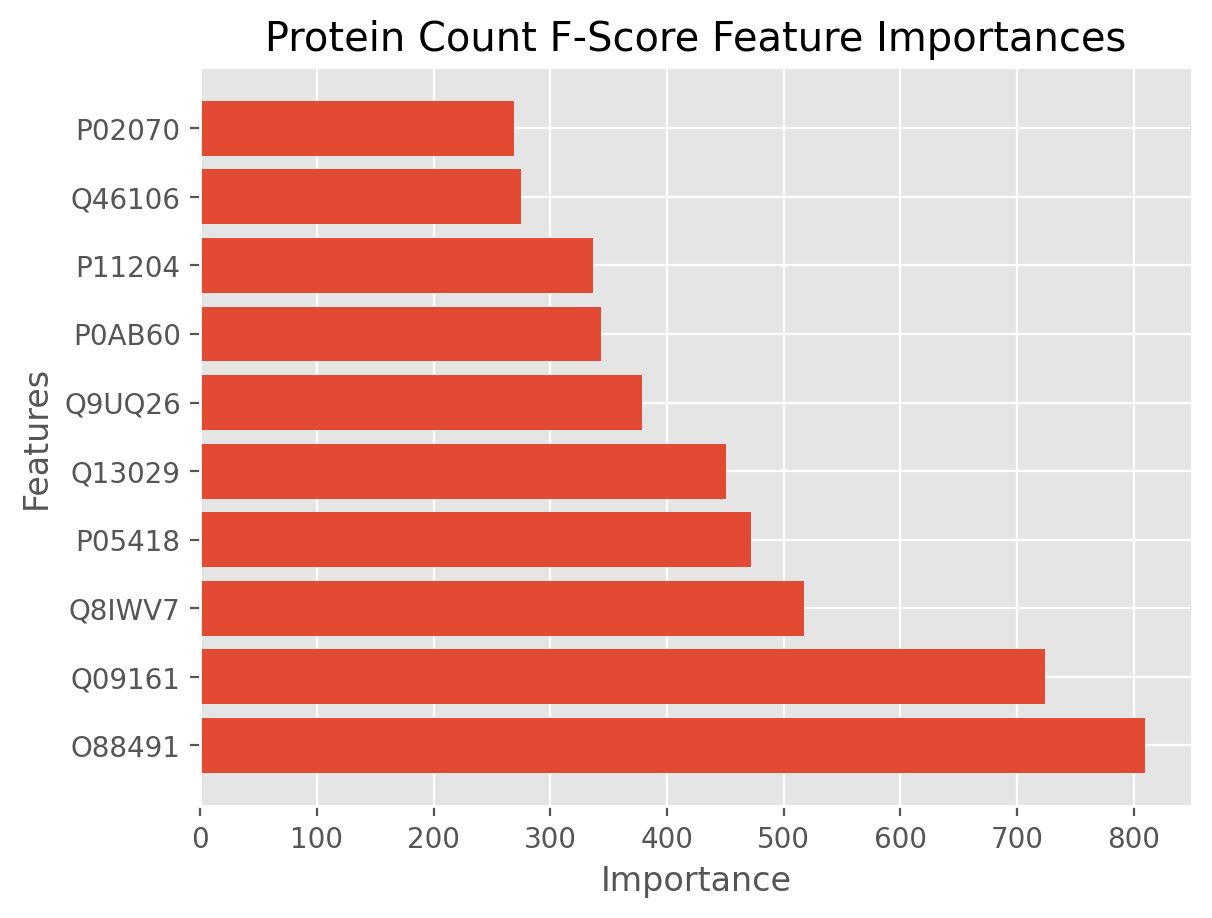

In [196]:
plot_imp(new_array, feature_importances_fscore, 'Protein Count F-Score')

# Doing the same for Amino Acids

There are possibilities that some amino acids are more favored to be in an alpha helix than the other ones (https://www.sciencedirect.com/science/article/pii/B978008101983200493X)

I want to check for Amino Acids and see if we can get a list of final categories that can be used for the model


In [197]:
Data_cat2= Data[['AA']]

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
Data_cat2 = onehot_encoder.fit_transform(Data_cat2)
Data_cat2

ID2=df_preprep["AA"].unique()
ID_check2=pd.DataFrame(ID2, columns=["AA"])
ID_check2

from sklearn.tree import DecisionTreeClassifier #getting the best features in categorical variables
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold #doing it only once, to save compuatation time


clf = DecisionTreeClassifier(random_state=999)
cv_method2 = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=5,
                                     random_state=999)

scoring_metric = 'top_k_accuracy'
cv_results_full2 = cross_val_score(estimator=clf,
                             X=Data_cat2,
                             y=target, 
                             cv=cv_method2, 
                             scoring=scoring_metric)


                                    

cv_results_full2.mean().round(3)
number_of_features=10 #  was 10, Getting the Top five amino acids which have the most probability that can be in alpha helix
fs_fit_fscore2 = fs.SelectKBest(fs.f_classif, k=10)
fs_fit_fscore2.fit_transform(Data_cat2, target)
fs_fit_fscore2
fs_indices_fscore2 = np.argsort(np.nan_to_num(fs_fit_fscore2.scores_))[::-1][0:10] #removing NaN values if present

fs_indices_fscore2

new_array2=[]
for i in range(0, len(fs_indices_fscore2)):
    value= ID_check2.iloc[fs_indices_fscore2[i],0]
    new_array2.append(value)
    
new_array2  #contains the 10 most likely amino acids that can be a part of alpha helix based on raw data    

['G', 'E', 'M', 'W', 'I', 'P', 'C', 'A', 'H', 'D']

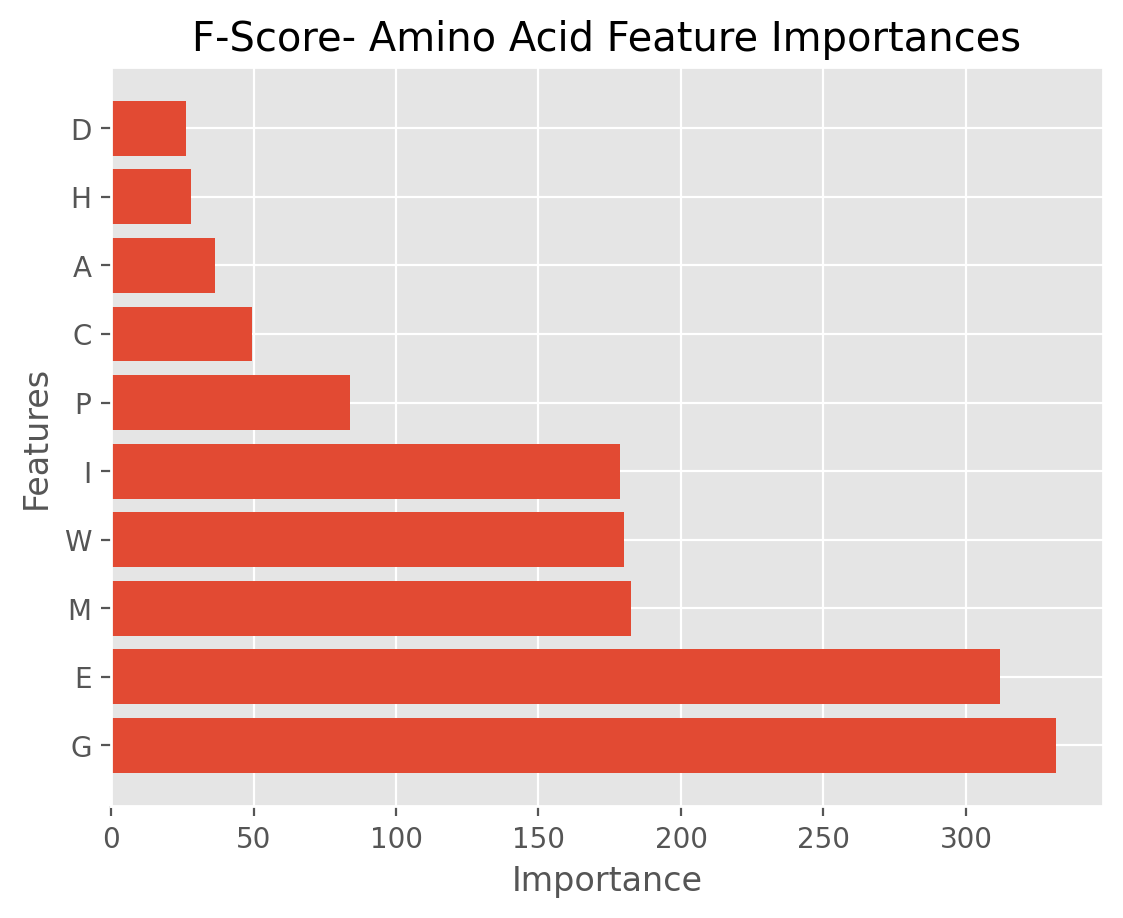

In [198]:
feature_importances_fscore2 = fs_fit_fscore2.scores_[fs_indices_fscore2]
feature_importances_fscore2
plot_imp(new_array2, feature_importances_fscore2, 'F-Score- Amino Acid')

# Conclusion

Checking the Two categorical attribute independantly with target (can it form amino acids or not) gave us a set of 40 proteins and 10 amino acids that can be used for dividing up into testing and training

The reason why I chose 40 proteins (out of a total of 133 proteins) is to ensure that our final model doesnt have too many protein categorical variables to give a test on. 

# Numeric Variable Analysis

### For Feature selection for Numerical variables

Pearson's correlation Gives us not so great results when we compare the data. Hence, we need to create new features and then see how much of a difference we are able to make

I will be creating the following variable(s) 

1) For example, the scales of AA_comp_in_Swiss_Prot and AA_composition have values that have a ratio between 0.8 and 1. Those two scales can be combined to create a new feature AA_protein_net= AA_composition/AA_comp_in_Swiss_Prot
2) AntiParallel strands are more twisted when compared to beta strands (https://www.cryst.bbk.ac.uk/PPS95/course/3_geometry/sheet.html). A twist in the otherwise planar structure of beta strands is morphologically close to a spiral alpha helix structure. Thus, I want to have a parameter which talks about the ratio of antiparallel beta strands/ total beta strands
3) I plan to have a rolling window parameter for transmembrane_tendency, because the position of the amino acid on transmembrane might later affect its hydrophobicity, so want to see how it is related. 
4) Removing the column buried residues because it is same as the accessible residues thing
5) Similar rolling window approaches will be done for Accessible residues and Average Flexibility due to the fact that these matter for position variable


#feature creation

#Feature1: AA_value
df_preprep["AA_Value"]= df_preprep["AA_composition"] / df_preprep["AA_comp_in_Swiss_Prot"]

#feature: Beta Ratio: 
df_preprep["Beta_Ratio"]= df_preprep["Antiparallel_beta_strand"]/df_preprep["Total_beta_strand"]

df_preprep.drop(columns=["AA_comp_in_Swiss_Prot","AA_composition","Antiparallel_beta_strand","Total_beta_strand"], axis=1, inplace=True)


#doing a bruteforce way addition of needed columns

s="Transmembrane_tendency"  

s1="Forward_Test"
s2="Reverse_Test"
d=10
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=d)
string_check=s
df_preprep[s1]= df_preprep[string_check].rolling(d).mean() #checks the previous 10 values rolling
df_preprep[s2] =df_preprep[string_check].rolling(window=indexer).mean() #checks the next 10 values rolling 
s3=string_check+'-'+'Aggregate'
m=len(df_preprep)
df_preprep[s3]= np.zeros(m)
df_preprep[s1].fillna(df_preprep[s1].mean(),inplace=True)
df_preprep[s2].fillna(df_preprep[s2].mean(),inplace=True)
for i in range(0, len(df_preprep)):
        df_preprep.at[i,s3]=(df_preprep.iloc[i].loc[s1] + df_preprep.iloc[i].loc[s2])/2


df_preprep.drop(['Forward_Test','Reverse_Test'], axis=1, inplace=True)

s="accessible_residues"  #adding feature for this only

s1="Forward_Test"
s2="Reverse_Test"
d=10
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=d)
string_check=s
df_preprep[s1]= df_preprep[string_check].rolling(d).mean() #checks the previous 10 values rolling
df_preprep[s2] =df_preprep[string_check].rolling(window=indexer).mean() #checks the next 10 values rolling 
s3=string_check+'-'+'Aggregate'
m=len(df_preprep)
df_preprep[s3]= np.zeros(m)
df_preprep[s1].fillna(df_preprep[s1].median(),inplace=True)
df_preprep[s2].fillna(df_preprep[s2].median(),inplace=True)
for i in range(0, len(df_preprep)):
        df_preprep.at[i,s3]=(df_preprep.iloc[i].loc[s1] + df_preprep.iloc[i].loc[s2])/2


df_preprep.drop(['Forward_Test','Reverse_Test'], axis=1, inplace=True)

s="buried_residues"  

s1="Forward_Test"
s2="Reverse_Test"
d=10
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=d)
string_check=s
df_preprep[s1]= df_preprep[string_check].rolling(d).mean() #checks the previous 10 values rolling
df_preprep[s2] =df_preprep[string_check].rolling(window=indexer).mean() #checks the next 10 values rolling 
s3=string_check+'-'+'Aggregate'
m=len(df_preprep)
df_preprep[s3]= np.zeros(m)
df_preprep[s1].fillna(df_preprep[s1].median(),inplace=True)
df_preprep[s2].fillna(df_preprep[s2].median(),inplace=True)
for i in range(0, len(df_preprep)):
        df_preprep.at[i,s3]=(df_preprep.iloc[i].loc[s1] + df_preprep.iloc[i].loc[s2])/2


df_preprep.drop(['Forward_Test','Reverse_Test'], axis=1, inplace=True)

s="Average_flexibility"  

s1="Forward_Test"
s2="Reverse_Test"
d=10
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=d)
string_check=s
df_preprep[s1]= df_preprep[string_check].rolling(d).mean() #checks the previous 10 values rolling
df_preprep[s2] =df_preprep[string_check].rolling(window=indexer).mean() #checks the next 10 values rolling 
s3=string_check+'-'+'Aggregate'
m=len(df_preprep)
df_preprep[s3]= np.zeros(m)
df_preprep[s1].fillna(df_preprep[s1].median(),inplace=True)
df_preprep[s2].fillna(df_preprep[s2].median(),inplace=True)
for i in range(0, len(df_preprep)):
        df_preprep.at[i,s3]=(df_preprep.iloc[i].loc[s1] + df_preprep.iloc[i].loc[s2])/2


df_preprep.drop(['Forward_Test','Reverse_Test'], axis=1, inplace=True)

In [199]:
df_preprep

,UniProt,Position,is_alpha_helix,AA,Coil_Deleage_Roux,beta_sheet_Deleage_Roux,HPLC_retention_pH74,beta_sheet_Levitt,Hphob_Wolfenden,beta_turn_Deleage_Roux,Bulkiness,Hphob_Black,n_codons,Hphob_Abraham_Leo,Hphob_Bull_Breese,Hphob_Janin,Hphob_Miyazawa,Hphob_HPLC_pH34_Cowan,beta_sheet_Chou_Fasman,Hphob_HPLC_pH75_Cowan,Hphob_Chothia,AA_composition,alpha_helix_Deleage_Roux,Transmembrane_tendency,HPLC_retention_pH21,Hphob_Hopp_Woods,HPLC_HFBA_retention,AA_comp_in_Swiss_Prot,Polarity_Zimmerman,Hphob_Manavalan,Hphob_Rao_Argos,Polarity_Grantham,beta_turn_Levitt,Hphob_Roseman,Average_flexibility,Refractivity,Average_area_buried,Hphob_Fauchere,Relative_mutability,Hphob_OMH_Sweet,Molecular_weight,Hphob_Eisenberg,HPLC_TFA_retention,alpha_helix_Levitt,Hphob_Welling,alpha_helix_Chou_Fasman,beta_turn_Chou_Fasman,Total_beta_strand,Antiparallel_beta_strand,Hphob_Guy,Ratio_hetero_endside,Hphob_HPLC_Wilson,Hphob_HPLC_Parker,Hphob_Tanford,buried_residues,Recognition_factors,Hphob_Rose,Parallel_beta_strand,accessible_residues,Hphob_Kyte_Doolittle,Hphob_Rf_mobility
0,A6X980,1.0,0,M,0.810,1.210,4.8,0.97,-1.48,0.436,16.25,0.738,1.0,1.10,-0.66,0.4,8.95,1.18,1.05,1.10,0.40,2.4,1.363,1.40,7.1,-1.3,4.1,2.42,1.43,14.39,1.42,5.7,0.41,0.96,0.30,21.64,172.9,1.23,94.0,1.02,149.0,0.64,5.6,1.47,-3.85,1.45,0.60,1.19,1.09,-1.59,0.00,2.5,-4.2,0.64,1.9,80.0,0.85,1.49,1.0,1.9,8.7
1,A6X980,2.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
2,A6X980,3.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
3,A6X980,4.0,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,12.82,0.236,2.0,-1.32,0.89,-0.5,3.71,-1.03,0.89,-0.99,0.12,4.4,0.772,-1.62,-1.6,0.2,-2.8,4.06,3.38,11.42,0.33,11.6,1.28,-1.91,0.46,13.28,103.3,-0.60,134.0,-0.92,132.0,-0.78,-5.7,0.90,-0.77,0.67,1.56,0.60,0.62,0.48,1.33,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
4,A6X980,5.0,0,S,1.130,0.928,1.2,0.95,-5.06,1.316,9.47,0.359,6.0,-0.84,0.42,-0.1,4.09,-0.64,0.75,-0.63,0.22,6.9,0.739,-0.53,-3.7,0.3,-3.5,6.56,1.67,11.23,0.97,9.2,1.32,-1.24,0.51,6.35,85.6,-0.04,120.0,-0.55,105.0,-0.18,-4.1,0.82,-0.26,0.77,1.43,0.82,0.87,0.52,1.42,-0.6,6.5,-0.18,8.0,107.0,0.66,0.70,9.4,-0.8,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57362,T0D7A2,1125.0,0,N,1.167,0.604,0.8,0.76,-9.68,1.572,12.82,0.236,2.0,-1.32,0.89,-0.5,3.71,-1.03,0.89,-0.99,0.12,4.4,0.772,-1.62,-1.6,0.2,-2.8,4.06,3.38,11.42,0.33,11.6,1.28,-1.91,0.46,13.28,103.3,-0.60,134.0,-0.92,132.0,-0.78,-5.7,0.90,-0.77,0.67,1.56,0.60,0.62,0.48,1.33,-0.2,7.0,-0.78,2.9,94.0,0.63,0.54,6.7,-3.5,0.6
57363,T0D7A2,1126.0,0,T,1.148,1.221,2.7,1.21,-4.88,0.739,15.77,0.450,4.0,-0.41,0.29,-0.2,4.49,-0.26,1.19,-0.27,0.23,5.8,0.785,-0.32,1.5,-0.4,1.1,5.34,1.66,11.69,1.08,8.6,1.04,-1.00,0.44,11.01,106.5,0.26,97.0,-0.28,119.0,-0.05,0.8,0.82,-0.45,0.83,0.96,1.12,1.30,0.07,0.71,-2.2,5.2,-0.05,4.9,93.0,0.70,0.59,7.0,-0.7,3.5
57364,T0D7A2,1127.0,0,G,1.251,0.657,0.0,0.92,2.39,1.860,3.40,0.501,4.0,0.00,0.81,0.3,4.48,0.00,0.75,0.00,0.36,7.2,0.510,-0.19,-0.5,0.0,-2.3,7.07,0.00,12.43,1.09,9.0,1.64,0.00,0.54,0.00,62.9,0.00,49.0,-0.67,75.0,0.48,-1.2,0.56,-1.84,0.57,1.56,0.61,0.56,0.33,0.74,1.2,5.7,0.48,11.8,84.0,0.72,0.79,6.7,-0.4,4.1
57365,T0D7A2,1128.0,0,D,1.197,0.541,-8.2,0.72,-10.95,1.197,11.68,0.028,2.0,-0.31,0.61,-0.6,3.59,-0.51,0.54,-2.15,0.15,5.3,0.924,-3.27,-2.8,3.0,-2.8,5.45,49.70,10.85,0.11,13.0,1.41,-3.81,0

In [200]:
#Doing a Pearson coefficient Matrix with the updated features
corr_matrix=df_preprep.corr(method='spearman') 

#Before we go on for feature selection using MIC, A first round of feature selection would involve weeding out pairwise correlations based on their spearman coefficients

R=[]
r=len(corr_matrix)
for column in corr_matrix:
    dummy=corr_matrix.columns.get_loc(column)
    for i in range(0,r):
         if (corr_matrix.iloc[i,dummy] >=0.9) and (corr_matrix.iloc[i,dummy] <1.0):
                s1=str(corr_matrix.index[i])
                s2=str(column)
                s3= s1+'-'+s2
                R.append(s3)
         elif (corr_matrix.iloc[i,dummy] <=-0.9) and (corr_matrix.iloc[i,dummy] >-1.0):
                s1=str(corr_matrix.index[i])
                s2=str(column)
                s3= s1+'-'+s2
                R.append(s3) 
 

S=[]
L=len(R) 
for i in range(0,L):
    SUPSTR1=R[i]
    SUPSTR1_list=SUPSTR1.split('-')
    str1=SUPSTR1_list[0]
    str2=SUPSTR1_list[1]
    for j in range(i,L):
        SUPSTR2=R[j]
        SUPSTR2_list=SUPSTR2.split('-')
        str3=SUPSTR2_list[0]
        str4=SUPSTR2_list[1]
        if ((str1==str3) and (str1==str4))  or ((str1==str4) and (str2==str3)) :
            new_str=str1+'-'+str2
            S.append(new_str)

l=len(S)
K=[]
for j in range(0,l):
    new=S[j].split('-')
    for m in range(0, len(new)):
        K.append(new[m])
    
array_unique=np.unique(K)
array_unique
l1=len(array_unique)       

S #Represents the features which have high correlation pairwise

['beta_sheet_Levitt-beta_sheet_Deleage_Roux',
 'beta_sheet_Chou_Fasman-beta_sheet_Deleage_Roux',
 'Total_beta_strand-beta_sheet_Deleage_Roux',
 'Antiparallel_beta_strand-beta_sheet_Deleage_Roux',
 'Polarity_Zimmerman-Hphob_Wolfenden',
 'beta_turn_Chou_Fasman-beta_turn_Deleage_Roux',
 'Hphob_HPLC_pH34_Cowan-Hphob_Black',
 'Hphob_HPLC_pH75_Cowan-Hphob_Black',
 'Transmembrane_tendency-Hphob_Black',
 'Hphob_Hopp_Woods-Hphob_Black',
 'Polarity_Grantham-Hphob_Black',
 'Hphob_Roseman-Hphob_Black',
 'Hphob_Fauchere-Hphob_Black',
 'Hphob_Eisenberg-Hphob_Black',
 'Hphob_HPLC_pH34_Cowan-Hphob_Abraham_Leo',
 'Hphob_Roseman-Hphob_Abraham_Leo',
 'Hphob_Fauchere-Hphob_Abraham_Leo',
 'Hphob_Tanford-Hphob_Abraham_Leo',
 'Hphob_Chothia-Hphob_Janin',
 'Transmembrane_tendency-Hphob_Janin',
 'Hphob_Rao_Argos-Hphob_Janin',
 'Hphob_Eisenberg-Hphob_Janin',
 'Hphob_Guy-Hphob_Janin',
 'Hphob_Tanford-Hphob_Janin',
 'Hphob_Rose-Hphob_Janin',
 'Hphob_Kyte_Doolittle-Hphob_Janin',
 'Transmembrane_tendency-Hphob_Miya

In [201]:
array_unique #Represents the total number of interactions that can be featurified
l=len(array_unique)
l

41

In [220]:
#Now, we are going to do scaling for further feature selection amongst these all. 

Data_numeric= df_preprep[array_unique]

In [221]:
Data_numeric.join(df_preprep["Position"])

,AA_comp_in_Swiss_Prot,AA_composition,Antiparallel_beta_strand,Average_area_buried,HPLC_HFBA_retention,HPLC_TFA_retention,HPLC_retention_pH21,Hphob_Abraham_Leo,Hphob_Black,Hphob_Chothia,Hphob_Eisenberg,Hphob_Fauchere,Hphob_Guy,Hphob_HPLC_Parker,Hphob_HPLC_pH34_Cowan,Hphob_HPLC_pH75_Cowan,Hphob_Hopp_Woods,Hphob_Janin,Hphob_Kyte_Doolittle,Hphob_Miyazawa,Hphob_OMH_Sweet,Hphob_Rao_Argos,Hphob_Rf_mobility,Hphob_Rose,Hphob_Roseman,Hphob_Tanford,Hphob_Wolfenden,Polarity_Grantham,Polarity_Zimmerman,Refractivity,Total_beta_strand,Transmembrane_tendency,alpha_helix_Chou_Fasman,alpha_helix_Deleage_Roux,alpha_helix_Levitt,beta_sheet_Chou_Fasman,beta_sheet_Deleage_Roux,beta_sheet_Levitt,beta_turn_Chou_Fasman,beta_turn_Deleage_Roux,beta_turn_Levitt,Position
0,2.42,2.4,1.09,172.9,4.1,5.6,7.1,1.10,0.738,0.40,0.64,1.23,-1.59,-4.2,1.18,1.10,-1.3,0.4,1.9,8.95,1.02,1.42,8.7,0.85,0.96,0.64,-1.48,5.7,1.43,21.64,1.19,1.40,1.45,1.363,1.47,1.05,1.210,0.97,0.60,0.436,0.41,1.0
1,6.56,6.9,0.87,85.6,-3.5,-4.1,-3.7,-0.84,0.359,0.22,-0.18,-0.04,0.52,6.5,-0.64,-0.63,0.3,-0.1,-0.8,4.09,-0.55,0.97,3.1,0.66,-1.24,-0.18,-5.06,9.2,1.67,6.35,0.82,-0.53,0.77,0.739,0.82,0.75,0.928,0.95,1.43,1.316,1.32,2.0
2,6.56,6.9,0.87,85.6,-3.5,-4.1,-3.7,-0.84,0.359,0.22,-0.18,-0.04,0.52,6.5,-0.64,-0.63,0.3,-0.1,-0.8,4.09,-0.55,0.97,3.1,0.66,-1.24,-0.18,-5.06,9.2,1.67,6.35,0.82,-0.53,0.77,0.739,0.82,0.75,0.928,0.95,1.43,1.316,1.32,3.0
3,4.06,4.4,0.62,103.3,-2.8,-5.7,-1.6,-1.32,0.236,0.12,-0.78,-0.60,0.48,7.0,-1.03,-0.99,0.2,-0.5,-3.5,3.71,-0.92,0.33,0.6,0.63,-1.91,-0.78,-9.68,11.6,3.38,13.28,0.60,-1.62,0.67,0.772,0.90,0.89,0.604,0.76,1.56,1.572,1.28,4.0
4,6.56,6.9,0.87,85.6,-3.5,-4.1,-3.7,-0.84,0.359,0.22,-0.18,-0.04,0.52,6.5,-0.64,-0.63,0.3,-0.1,-0.8,4.09,-0.55,0.97,3.1,0.66,-1.24,-0.18,-5.06,9.2,1.67,6.35,0.82,-0.53,0.77,0.739,0.82,0.75,0.928,0.95,1.43,1.316,1.32,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57362,4.06,4.4,0.62,103.3,-2.8,-5.7,-1.6,-1.32,0.236,0.12,-0.78,-0.60,0.48,7.0,-1.03,-0.99,0.2,-0.5,-3.5,3.71,-0.92,0.33,0.6,0.63,-1.91,-0.78,-9.68,11.6,3.38,13.28,0.60,-1.62,0.67,0.772,0.90,0.89,0.604,0.76,1.56,1.572,1.28,1125.0
57363,5.34,5.8,1.30,106.5,1.1,0.8,1.5,-0.41,0.450,0.23,-0.05,0.26,0.07,5.2,-0.26,-0.27,-0.4,-0.2,-0.7,4.49,-0.28,1.08,3.5,0.70,-1.00,-0.05,-4.88,8.6,1.66,11.01,1.12,-0.32,0.83,0.785,0.82,1.19,1.221,1.21,0.96,0.739,1.04,1126.0
57364,7.07,7.2,0.56,62.9,-2.3,-1.2,-0.5,0.00,0.501,0.36,0.48,0.00,0.33,5.7,0.00,0.00,0.0,0.3,-0.4,4.48,-0.67,1.09,4.1,0.72,0.00,0.48,2.39,9.0,0.00,0.00,0.61,-0.19,0.57,0.510,0.56,0.75,0.657,0.92,1.56,1.860,1.64,1127.0
57365,5.45,5.3,0.47,97.8,-2.8,-2.9,-2.8,-0.31,0.028,0.15,-0.90,-0.77,0.78,10.0,-0.51,-2.15,3.0,-0.6,-3.5,3.59,-1.31,0.11,0.7,0.62,-3.81,-0.09,-10.95,13.0,49.70,12.00,0.48,-3.27,1.01,0.924,1.04,0.54,0.541,0.72,1.46,1.197,1.41,1128.0


In [222]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler() 
std_scaled = scaler_std.fit_transform(Data_numeric) 
array_mut=sklearn.feature_selection.mutual_info_classif(std_scaled,target)
array_mut.mean().round(3)

num_feature_best_to_choose=15
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_feature_best_to_choose)
fs_fit_fscore.fit_transform(Data_numeric, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_feature_best_to_choose]
best_features_fscores = Data_numeric.columns[fs_indices_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

ValueError: Found input variables with inconsistent numbers of samples: [57367, 10543]

In [223]:
from sklearn import decomposition

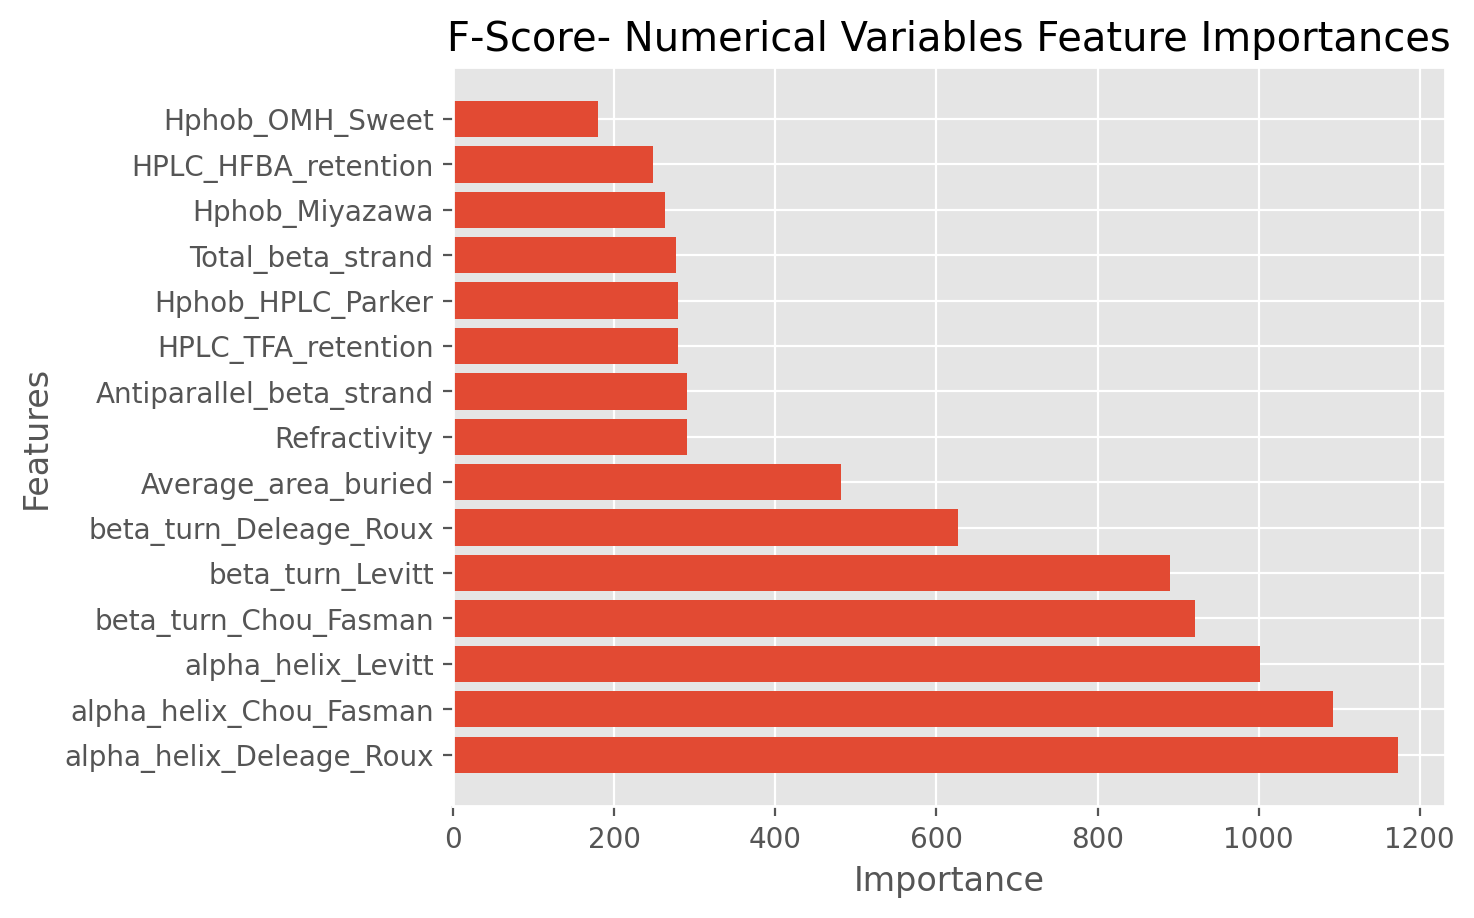

In [224]:
plot_imp(best_features_fscores, feature_importances_fscore, 'F-Score- Numerical Variables')

In [225]:
A

['alpha_helix_Deleage_Roux',
 'alpha_helix_Chou_Fasman',
 'alpha_helix_Levitt',
 'beta_turn_Chou_Fasman',
 'beta_turn_Levitt',
 'beta_turn_Deleage_Roux',
 'Average_area_buried',
 'Refractivity',
 'Antiparallel_beta_strand',
 'HPLC_TFA_retention',
 'Hphob_HPLC_Parker',
 'Total_beta_strand',
 'Hphob_Miyazawa',
 'HPLC_HFBA_retention',
 'Hphob_OMH_Sweet',
 'Position']

# Conclusion

Despite us adding new features that might have proven to be a better fit, we see with F Score statistic the top 15 features that we want to choose. We will also include Position for the final model, because we need it as an input variable.

In [227]:
A=list(best_features_fscores)
A.append('Position')


#Now We input these features and remove the excess categorical variables to get a final form of dataframe that can be put in the pipeline

#1 Removing the excess Protein and Amino Acid categories:

new_array #Represents the 40 proteins that we need for checking
new_array2 #Represents the 10 AA that we need for checking
A #Refers to the list of numerical features that we need for predicting

df_1_preprocess=df_preprep[df_preprep["UniProt"].isin(new_array)] #supposed to be df_1
df_2_preprocess=df_1_preprocess[df_1_preprocess["AA"].isin(new_array2)] #gets it in terms of trainable data For now, not removing all the amino acid categories and seeing how it fits- but i M not removing them
df_cat_variables=df_2_preprocess[["UniProt","AA"]] #separates the categorical variables
df_target_variable=df_2_preprocess[["is_alpha_helix"]]                                 
df_num_variables= df_2_preprocess[A] #separates the numerical variables

df_input1=df_cat_variables.join(df_num_variables)
df_input= df_input1.join(df_target_variable)
df_input.reset_index(inplace=True)
df_input.drop(columns=['index'],inplace=True)
df_input
df_input.columns.values

array(['UniProt', 'AA', 'alpha_helix_Deleage_Roux',
       'alpha_helix_Chou_Fasman', 'alpha_helix_Levitt',
       'beta_turn_Chou_Fasman', 'beta_turn_Levitt',
       'beta_turn_Deleage_Roux', 'Average_area_buried', 'Refractivity',
       'Antiparallel_beta_strand', 'HPLC_TFA_retention',
       'Hphob_HPLC_Parker', 'Total_beta_strand', 'Hphob_Miyazawa',
       'HPLC_HFBA_retention', 'Hphob_OMH_Sweet', 'Position',
       'is_alpha_helix'], dtype=object)

In [228]:
df_input["is_alpha_helix"].value_counts(1)  #Not surprising, because the data is more negatively weighed towards non zero values. increasing the number of proteins/AA isnt gonna make a big deal

0    0.875563
1    0.124437
Name: is_alpha_helix, dtype: Float64

In [229]:
A

['alpha_helix_Deleage_Roux',
 'alpha_helix_Chou_Fasman',
 'alpha_helix_Levitt',
 'beta_turn_Chou_Fasman',
 'beta_turn_Levitt',
 'beta_turn_Deleage_Roux',
 'Average_area_buried',
 'Refractivity',
 'Antiparallel_beta_strand',
 'HPLC_TFA_retention',
 'Hphob_HPLC_Parker',
 'Total_beta_strand',
 'Hphob_Miyazawa',
 'HPLC_HFBA_retention',
 'Hphob_OMH_Sweet',
 'Position']

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


df_target_input = preprocessing.LabelEncoder().fit_transform(df_target_variable) 

onehot_encoder = OneHotEncoder()
cat_1_hot = onehot_encoder.fit_transform(df_cat_variables)

num_variables=A
cat_variables=["UniProt","AA"]

num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()) ])
full_pipeline = ColumnTransformer([("num", num_pipeline, num_variables),("cat", OneHotEncoder(), cat_variables),])
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['alpha_helix_Deleage_Roux',
                                  'alpha_helix_Chou_Fasman',
                                  'alpha_helix_Levitt', 'beta_turn_Chou_Fasman',
                                  'beta_turn_Levitt', 'beta_turn_Deleage_Roux',
                                  'Average_area_buried', 'Refractivity',
                                  'Antiparallel_beta_strand',
                                  'HPLC_TFA_retention', 'Hphob_HPLC_Parker',
                                  'Total_beta_strand', 'Hphob_Miyazawa',
                                  'HPLC_HFBA_retention', 'Hphob_OMH_Sweet',
                                  'Position']),
                                ('cat', OneHotEncoder(), ['UniProt', 'AA'])])

In [231]:
df_cat_variables

,UniProt,AA
4925,O88491,M
4926,O88491,D
4929,O88491,C
4930,O88491,E
4936,O88491,C
...,...,...
53352,Q9UQ26,P
53357,Q9UQ26,A
53363,Q9UQ26,E
53367,Q9UQ26,G


In [232]:
df_input_feature=df_input.drop(columns=['is_alpha_helix']) #Just run this code once only
Data_prepared = full_pipeline.fit_transform(df_input_feature)
Data_prepared.shape #Dimenions of the cleaned data ready to be tested

(4661, 36)

In [233]:
from sklearn.model_selection import train_test_split

target=df_target_input

#splitting the data for testing and training on a ratio of 25:75

X_train, X_test, y_train, y_test = train_test_split(Data_prepared, target, test_size=0.25, random_state=1, stratify=target)
print('Training samples: {}'.format(X_train.shape[0]))
print('Testing samples: {}'.format(X_test.shape[0]))

Training samples: 3495
Testing samples: 1166


# Machine Learning Models that are to be tested out

1) Logistic Regression Classifier
2) Decsion Tree Classifier
3) Random Forest Classifier

In [234]:
#Testing on Logistic Regression Classifier:

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
threshold=0.4 # 0.4 increases TPR
log_reg.fit(X_train, y_train)

LogisticRegression()

In [235]:
from sklearn.model_selection import cross_val_score

#defining a function for cross validation- taking this function as it is from the lab notes

def cross_validation(reg, X, y, scoring):
    scores = cross_val_score(
         reg, X, y,  # estimator: the object to use to fit the data
         cv = 5)  # 5-fold cross validation
    return scores

In [236]:
#Doing K Fold cross verification

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=9, random_state=999)
scores1 = cross_val_score(log_reg, X_test, y_test, scoring='precision_weighted', cv=cv_method)        
print('Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

#To know the number of iterations that's been done and the result that we get for each iteration of K fold

for index in scores1:
    print("The score got by validation for each run is ",index) 

Accuracy: 0.926 (0.021)
The score got by validation for each run is  0.9367184178504934
The score got by validation for each run is  0.9586982736735211
The score got by validation for each run is  0.9145299145299145
The score got by validation for each run is  0.914918414918415
The score got by validation for each run is  0.9371530531324345
The score got by validation for each run is  0.9467754467754467
The score got by validation for each run is  0.9195689655172414
The score got by validation for each run is  0.9467391972462965
The score got by validation for each run is  0.9261474704824458
The score got by validation for each run is  0.9168383340797134
The score got by validation for each run is  0.9089827383945032
The score got by validation for each run is  0.9178113553113553
The score got by validation for each run is  0.9145299145299145
The score got by validation for each run is  0.9371184371184371
The score got by validation for each run is  0.9316239316239316
The score got by 

In [237]:
#Comparing with accuracy as an f1 score to verify and see

y1_pred=log_reg.predict(X_train)
y1_pred

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

result1=accuracy_score(y1_pred,y_train)
result1b=f1_score(y1_pred, y_train)

print("The prediction score out of the prediction by logistic regression comes out to be:", result1)
print("The f1 score out of the prediction by logistic regression comes out to be:", result1b)

The prediction score out of the prediction by logistic regression comes out to be: 0.9316165951359084
The f1 score out of the prediction by logistic regression comes out to be: 0.7370737073707371


#Testing on Random Forest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc_classifier=RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)
rfc_classifier.fit(X_train, y_train)

#Doing K Fold cross verification

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=9, random_state=999)
scores2 = cross_val_score(rfc_classifier, X_test, y_test, scoring='precision_weighted', cv=cv_method)        
print('Accuracy: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))

#To know the number of iterations that's been done and the result that we get for each iteration of K fold

for index in scores2:
    print("The score got by validation for each run is ",index) 

In [88]:
#Comparing with accuracy as an f1 score to verify and see

y2_pred=rfc_classifier.predict(X_train)
y2_pred

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

result2=accuracy_score(y2_pred,y_train)
result2b=f1_score(y2_pred,y_train)

print("The accuracy score out of the prediction by random forest classifier comes out to be:", result2)
print("The f1 score out of the prediction by random forest classifier comes out to be:", result2b)

The accuracy score out of the prediction by random forest classifier comes out to be: 0.8727709624383457
The f1 score out of the prediction by random forest classifier comes out to be: 0.0


#Testing on Decision Regression Classifier:

from sklearn.tree import DecisionTreeClassifier

dfc_classifier=DecisionTreeClassifier(criterion="entropy", max_depth=5)
dfc_classifier.fit(X_train, y_train)

#Doing K fold cross verification:

cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=9, random_state=999)
scores3 = cross_val_score(dfc_classifier, X_test, y_test, scoring='precision_weighted', cv=cv_method)        
print('Accuracy: %.3f (%.3f)' % (np.mean(scores3), np.std(scores3)))

#To know the number of iterations that's been done and the result that we get for each iteration of K fold

for index in scores3:
    print("The score got by validation for each run is ",index) 

y3_pred=dfc_classifier.predict(X_train)
y3_pred

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

result3=accuracy_score(y3_pred,y_train)
result3b=f1_score(y3_pred,y_train)

print("The accuracy score out of the prediction by random forest classifier comes out to be:", result3)
print("The f1 score out of the prediction by random forest classifier comes out to be:", result3b)

# To define Type 1 and Type 2 Errors for Our Problem so that we can interpret results

##### Type 1 Error: (False Positive)- Test says that our residue is a part of alpha helix despite it not actually being in one.

##### Type 2 error (False Negative)- Test says that our residue is not a part of alpha helix, despite it  actually being in one. 

## When we compare the type errors with biochemical understanding

A type1 error can also possibly mean that a given residue can be within the vicinity (~ +10/-10 neighbours at max from an alpha helix residue) of a alpha helix, and the model could predict the residue as being in one, due to the residues having similar hydrophobic scale values. This could also mean the 3D Tertiary structures of proteins can also play a role on this

A type 2 error can indicate that a residue in question might be a non polar residue which is seen rarely , when compared to polar ones. Sometimes, a non polar residue can also be a part of alpha helix in a protein (https://www.sciencedirect.com/science/article/pii/B978008101983200493X)

So, when we do a tradeoff between type1 and type2 errors:- We see that, a type 1 error is more unacceptable than a type 2 error ie. the cost of a model predicting a type 2 error is much less when compared to type 1 error. A T test would NOT be an accurate way to go about because of the following reason 

(taken from source:https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/)

Namely, the observations in each sample are not independent. As part of the k-fold cross-validation procedure, a given observation will be used in the training dataset (k-1) times. This means that the estimated skill scores are dependent, not independent, and in turn that the calculation of the t-statistic in the test will be misleadingly wrong along with any interpretations of the statistic and p-value.

So, we do another comparison test called the: McNemar Test

The McNemar test has one of the best error prediction, but there are disadvantages

#Initial comparison for the fscore and accuracy values of the three models:-

Result_Big= [result1, result2, result3]
Result_f_big=[result1b, result2b, result3b]

#These are arranged in their respective orders of algorithms: ie: Logistic, Random Forest, Decision Forest

print("The max value for accuracy metric ", max(Result_Big))
print("The max value for f_score metric ", max(Result_f_big))

#Initial Prelimnary results show that comparison of the three models yields logistical regression to be the best amongst those three

#To make a contigency table and check out the values from McNemar Test:


import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

In [161]:
#pip install mlxtend just need it once

tb = mcnemar_table(y_target=y_train, y_model1=y1_pred,y_model2=y2_pred) #creates the mcnemar table comparison of model 1 and model 2
chi2, p1 = mcnemar(tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p1)

tb = mcnemar_table(y_target=y_train, y_model1=y1_pred,y_model2=y3_pred)#creates the mcnemar table comparison of model 1 and model 3
chi2, p2 = mcnemar(tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p2)

#making a dataframe containing the results which can be said easily

Result_Big #contains the precision weighted scores
Result_f_big #contains the F1 scores
Result_mcNemar= [0,p1, p2] #contains the McNemar Scores
Result_std_deviation_models= [np.std(scores1), np.std(scores2), np.std(scores3)]
Result_mean= [np.mean(scores1), np.mean(scores2), np.mean(scores3)]
Result_cols=["Logistic Regression","Random Forest Classifier","Decision Tree Classifier"]
Result_Categories=["Precision_Weighted_Score","F1_Scores","McNemar Coefficients","Standard Deviation Cross Validation"," Mean Cross Validation"]
df_compare1= pd.DataFrame()

df_compare1[Result_Categories[0]]=Result_Big
df_compare1[Result_Categories[1]]=Result_f_big
df_compare1[Result_Categories[2]]=Result_mcNemar
df_compare1[Result_Categories[3]]= Result_std_deviation_models
df_compare1[Result_Categories[4]]= Result_mean

df_verify=df_compare1.T
df_verify.rename(columns={0:Result_cols[0],1:Result_cols[1], 2:Result_cols[2]}, inplace=True)
df_verify

In [162]:
#The validation of the models with three metrics clearly suggest that logistic model is the bets and there is a clear statistical difference

# HyperParameter Tuning For Logistic Regression

In [163]:
#Applying Random Search for Logistic regression :- anyhow Logistic regression does not really have any critical hyperparameters to tune.

In [238]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [239]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
max_iter=[2000]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [240]:
grid = dict(solver=solvers,penalty=penalty,C=c_values, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision_weighted',error_score=0)
grid_result = grid_search.fit(Data_prepared, target) #checking the fit on the entire dataset, including training and testing

In [241]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#Logistic Regression doesnt really rank features- it insteads gives the best parameter setting to solve with the regressor

Best: 0.935036 using {'C': 1.0, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934771 (0.008675) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934771 (0.008675) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.934771 (0.008675) with: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
0.934519 (0.008973) with: {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.934519 (0.008973) with: {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.934554 (0.008822) with: {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
0.935036 (0.009142) with: {'C': 1.0, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.935036 (0.009142) with: {'C': 1.0, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.934998 (0.009175) with: {'C': 1.0, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
0.924024 (0.008935) with: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2'

# ROC Curves for the final model 

In [242]:
final_model = grid_search.best_estimator_
final_model

LogisticRegression(max_iter=2000, solver='newton-cg')

In [243]:
from sklearn.metrics import mean_squared_error
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# RMSE on test set
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

0.257088351740911
0.2619363179255036


The value of Area under the ROC curve comes around: 0.8454388868249519


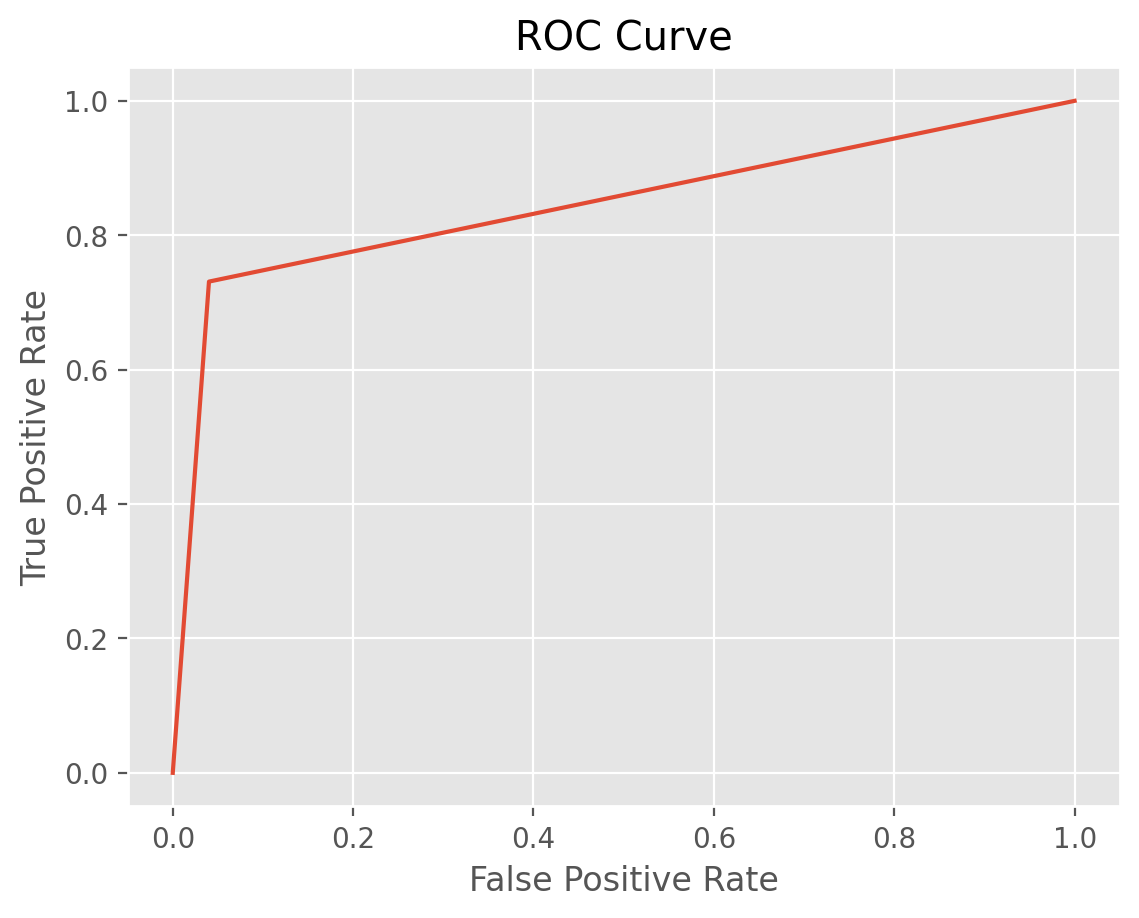

In [244]:
from sklearn import metrics
fpr, tpr,_  = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test, y_pred_test)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

print("The value of Area under the ROC curve comes around:", auc)

In [245]:
import joblib

# Save the model
joblib.dump(final_model, "final_model.pkl")

# Reload the model later...
# final_model = joblib.load("final_model.pkl")

['final_model.pkl']